# Introduction to Sampling and Hypothesis Testing

## Sampling | Confidence intervals

In [1]:
# Select this cell and type Ctrl-Enter to execute the code below.

set_plot_dimensions <- function(width_choice, height_choice) {
    options(repr.plot.width = width_choice, repr.plot.height = height_choice)
}


### Standard normal distribution

Consider a normal distribution with mean 0 and standard deviation 1:

$$Z \sim N(0,1)$$

$Z$ is known as the *standard normal distribution*.




In [2]:
# a standard normal distribution
mu <- 0
sigma <- 1

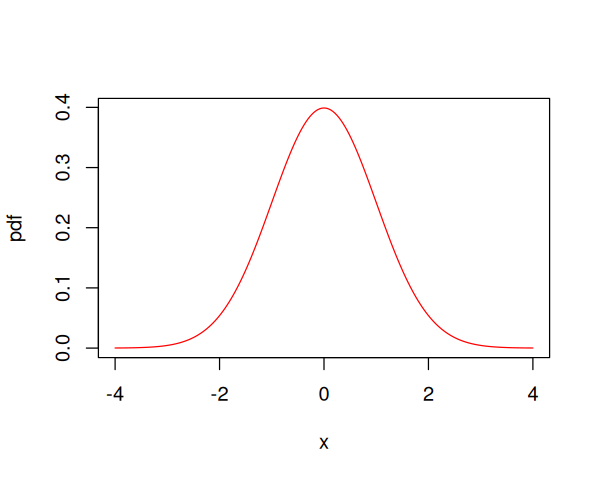

In [3]:
# plot the probability density function

wid <- 0.01
x <- seq(-4, 4, wid)
pdf <- dnorm(x, mu, sigma)

set_plot_dimensions(5, 4)
plot(x, pdf, xlab = "x", type = "l", col = "red")


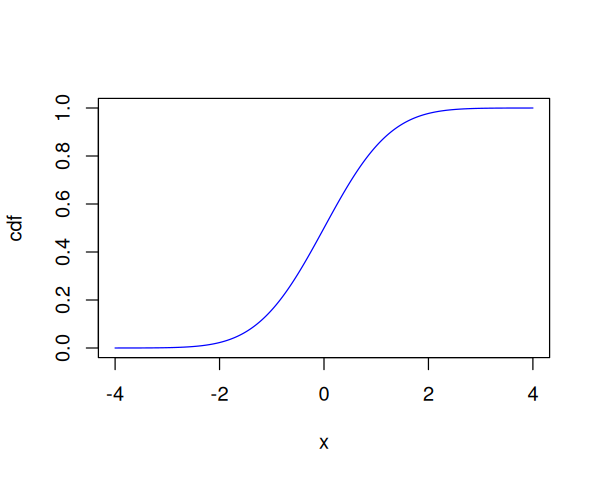

In [4]:
# plot the cumulative distribution function

cdf <- pnorm(x, mu, sigma)

set_plot_dimensions(5, 4)
plot(x, cdf, xlab = "x", ylim = c(0, 1), type = "l", col = "blue")


How much of the probability mass lies within one, two, or three standard deviations of the mean? (Hint: use the cdf!)

In [5]:
# one sigma
pnorm(1, mu, sigma) - pnorm(-1, mu, sigma)


[1] 0.6826895

In [6]:
# two sigma
pnorm(2, mu, sigma) - pnorm(-2, mu, sigma)


[1] 0.9544997

In [7]:
# three sigma
pnorm(3, mu, sigma) - pnorm(-3, mu, sigma)


[1] 0.9973002

We are often interested in the regions containing a certain percentage of the probability mass, for example, find $z_{90}$ such that

$$\mathbb{P}(-z_{90} < z < z_{90}) = 0.9$$

R makes it easy for us to find these *critical values* of $z$, using the *quantile* function `qnorm` e.g.

In [8]:
alpha <- 0.1 # how much probability will remain in the tails

qnorm(alpha / 2, mu, sigma) # the critical value for the lower tail
qnorm(1 - alpha / 2, mu, sigma) # the critical value for the upper tail = z90


[1] -1.644854

[1] 1.644854

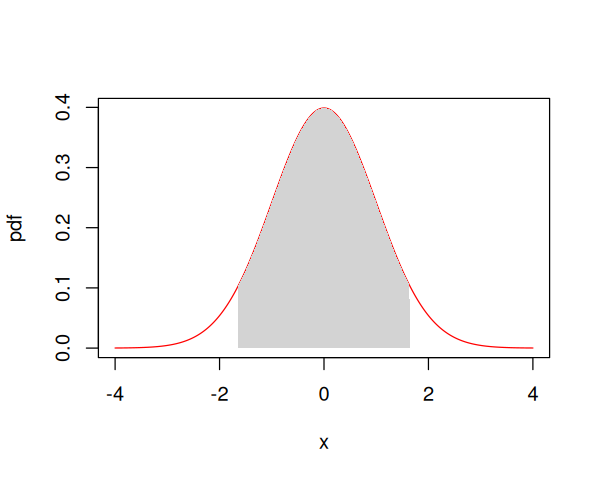

In [9]:
# plot the probability density function
plot(x, pdf, xlab = "x", type = "l", col = "red")

# the shaded region contains 90% of the probability mass
z90 <- qnorm(1 - alpha / 2, mu, sigma)
x_region <- seq(-z90, z90, wid)
polygon(c(x_region, z90, -z90), c(dnorm(x_region, mu, sigma), 0, 0), border = NA, col = "lightgrey")


Find the corresponding critical values for 95% and 99% of the probability mass.

In [10]:
# 95%
qnorm(1 - 0.05 / 2, mu, sigma)


[1] 1.959964

In [11]:
#99%
qnorm(1-0.01/2,mu,sigma)


[1] 2.575829

### Z-score

Note that we can *standardise* any random variable by subtracting the mean and dividing by the standard deviation. When applied to a single observation, this is known as the *z-score*:

$$z =\frac{x-\mu}{\sigma}$$


### Confidence intervals

The best single estimate of the population mean $\mu$ based on a sample of data is simply the sample mean, $\bar{x}$ (therefore $\bar{x}$ is used in standardisation below.). 

However, it is often useful to describe the precision of our estimate by giving a *confidence interval* instead of a point estimate.

We say that the true mean lies within the interval with e.g. 90% confidence.

From the central limit theorem, $\bar{X} \sim N(\mu,\sigma^2/n)$

When $n$ is large (>30), we have $\sigma \approx s$, so $\bar{X} \sim N(\mu,s^2/n)$

Standardisation gives 
$$z = \frac{\bar{x}-\mu}{s/\sqrt{n}}$$

From the above critical value calculation, the 90\% confidence interval is where $-1.64 < z < 1.64$

Substituting for $z$, we have

$$\mathbb{P}\left(\bar{x}-1.64\frac{s}{\sqrt{n}} < \mu < \bar{x}+1.64\frac{s}{\sqrt{n}}\right) =  0.9$$



#### Example: speed of light

Below are the results of 64 measurements of the speed of light made by Simon Newcomb in 1882, in km/s.

In [12]:
data <- c(
    265848, 256680, 248124, 310155, 265848, 201182, 232617,
    206770, 275694, 286297, 265848, 256680, 286297, 275694,
    338351, 323640, 372187, 297749, 297749, 206770, 323640,
    240120, 232617, 310155, 275694, 225568, 465233, 310155,
    256680, 206770, 354463, 265848, 286297, 275694, 275694,
    232617, 297749, 265848, 310155, 186093, 354463, 240120,
    232617, 265848, 286297, 248124, 275694, 286297, 310155,
    232617, 256680, 218933, 297749, 391775, 206770, 256680,
    248124, 338351, 265848, 225568, 190865, 297749, 465233,
    323640
)


Based on these data, calculate a 95% confidence interval for the speed of light.

In [13]:
# first, calculate the sample mean and s.d.
xbar <- mean(data)
xbar

s <- sd(data) ## sd() uses the unbiased estimator
s


[1] 277866.7

[1] 55638.32

In [14]:
# now find the critical value
z95 <- qnorm(1 - 0.05 / 2, mu, sigma)
z95


[1] 1.959964

In [15]:
# finally calculate the 95% confidence interval for mu
ci <- c(xbar - z95 * s / sqrt(64), xbar + z95 * s / sqrt(64))
ci


[1] 264235.5 291497.8

### Confidence intervals for small $n$

The central limit theorem only applies when $n$ is large. For small samples ($n$<30), the normal distribution is not a good approximation to the sampling distribution of the mean, because our estimate of the population variance is likely to be poor.

However, for situations where the *population* is expected to be normally distributed, we can use **Student's t-distribution** to construct an appropriate confidence interval. This has a broader bell-curve, which reflects our lack of knowledge about the population variance.

The t-distribution takes a single parameter, which is $\nu$, the number of degrees of freedom. We set this as $n-1$.

For high values of $\nu$, the t-distribution converges to the normal distribution.


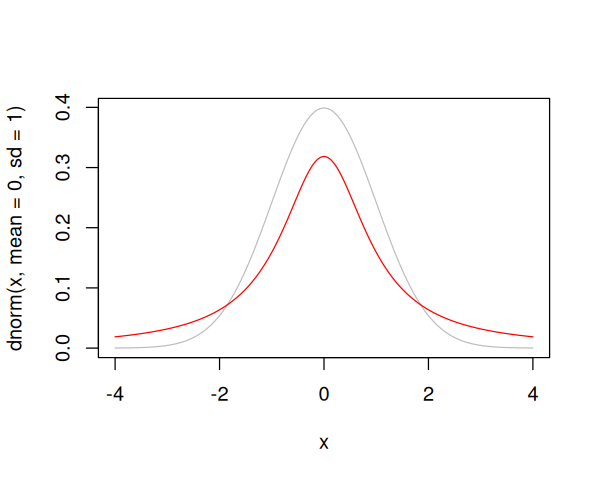

In [16]:
x <- seq(-4, 4, 0.01)
plot(x, dnorm(x, mean = 0, sd = 1), xlab = "x", type = "l", col = "grey")
lines(x, dt(x, df = 1), col = "red")


#### Example: counting beetles

You have been asked to measure the density of a particular species of beetle in a field.

The following are the observed numbers in 10 samples using a 1 m<sup>2</sup> [quadrat](https://en.wikipedia.org/wiki/Quadrat).

In [17]:
data <- c(5, 1, 6, 3, 2, 4, 2, 7, 1, 0)


Calculate a 95% confidence interval for the beetle density.

In [18]:
# first, calculate the sample mean and s.d.
xbar <- mean(data)
xbar

s <- sd(data)
s


[1] 3.1

[1] 2.330951

In [19]:
# now find the critical value
t95 <- qt(1 - 0.05 / 2, df = 9) # df = n-1
t95


[1] 2.262157

In [20]:
# finally calculate the 95% confidence interval for mu
ci <- c(xbar - t95 * s / sqrt(10), xbar + t95 * s / sqrt(10))
ci


[1] 1.432538 4.767462